This is a Jupyter Notebook file (`.ipynb` extension) that contains Python code and markdown cells focused on Logistic Regression exercises.

The dataset used in this notebook is the **Breast Cancer Wisconsin (Diagnostic) Dataset** which has the following characteristics:

1. Size: 569 datapoints
2. Features: 30 variables
3. Classes: 2 (Malignant and Benign)

The features in the dataset include measurements of breast cancer cells like:
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension

For each of these features, the dataset includes:
- The mean value
- The standard error
- The "worst" or largest value (mean of the three worst/largest values)

This results in the total 30 features (10 original features × 3 measurements each).

The notebook appears to be using this dataset to demonstrate logistic regression classification techniques, including visualization of decision boundaries and model training.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Exercise 1**

[Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) 569 datapoints, 30 variables, 2 classes



$$
x^{(i)}=[x^{(i)}_1,x_2^{(i)},...,x_{30}^{(i)}],\quad y^{(i)}=0,1
$$


$$
$$

Attribute Information:

    radius (mean of distances from center to points on the perimeter)

    texture (standard deviation of gray-scale values)

    perimeter

    area

    smoothness (local variation in radius lengths)

    compactness (perimeter^2 / area - 1.0)

    concavity (severity of concave portions of the contour)

    concave points (number of concave portions of the contour)

    symmetry

    fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.




    class:

            WDBC-Malignant

            WDBC-Benign



In [7]:
pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 7.7 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [11]:
#load the dataset
from sklearn import datasets
X,y=datasets.load_breast_cancer(return_X_y=True)
#rows of X are the coordinates x1...x30
#y contains the classes 0,1

In [12]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Draw a picture like below of the distributions of the values of coordinates $x_1,..,x_{30}$

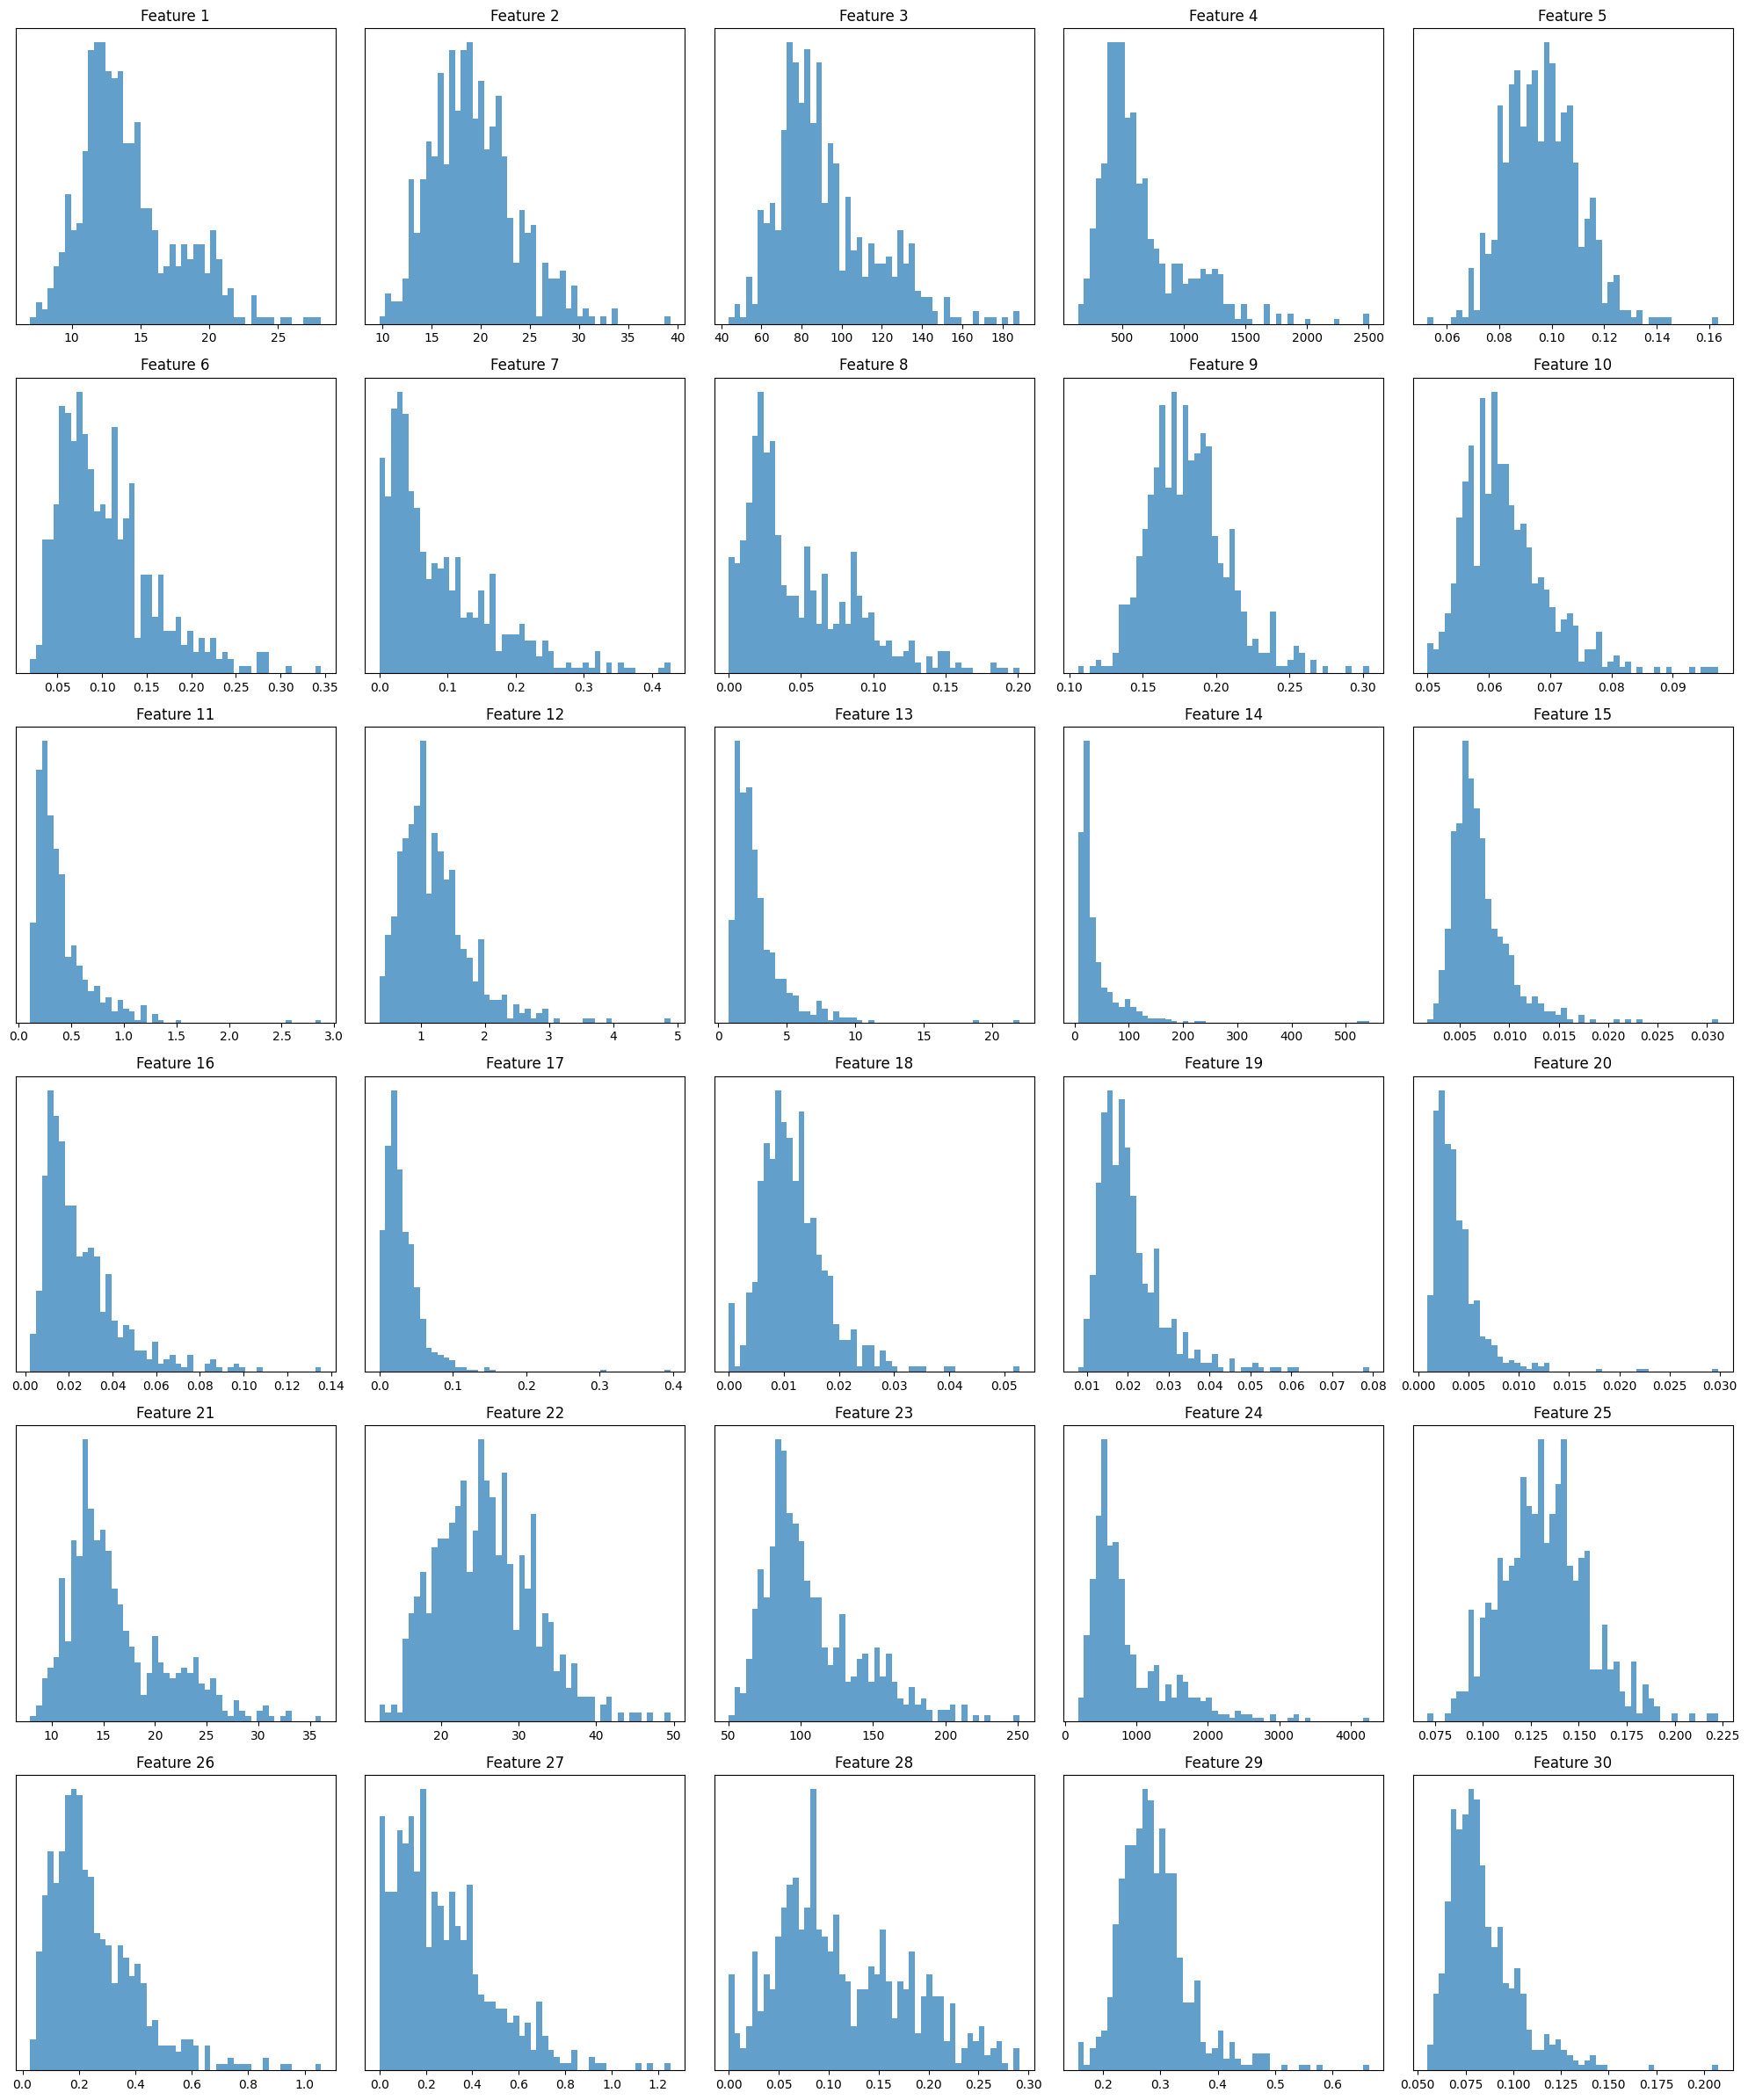

In [13]:
fig, axes = plt.subplots(6, 5, figsize=(20, 24))
axes = axes.ravel()

for i in range(30):
    _, bins, _ = axes[i].hist(X[:, i], bins=50, density=True, alpha=0.7)
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

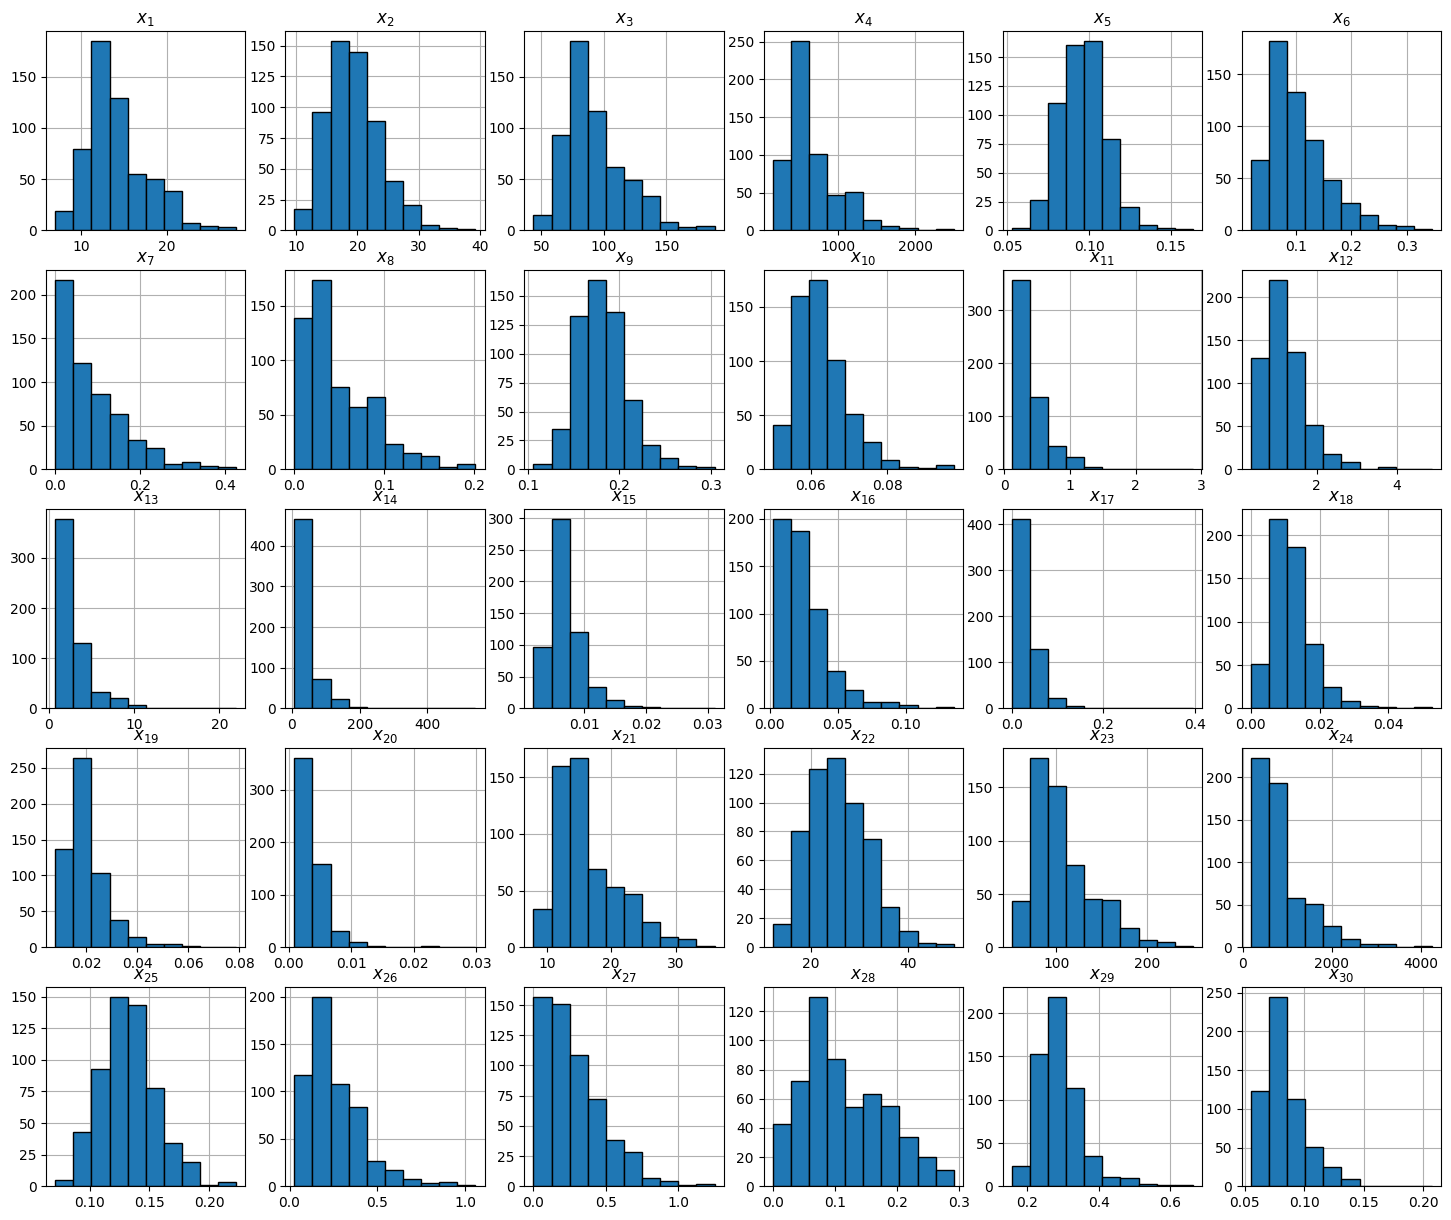

Find coefficients to a formula

$$
z=w_1\widehat{x}_1+w_2\widehat{x}_2+\dots+\widehat{x}_{30}+b
$$

for the classification of a point $x=[x_1,x_2,...,x_{30}]$ using the scaled coordinates (means $=0$ and standard deviations $=1$)
and draw a picture like below:

In [14]:
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_scaled, y)

# Get coefficients and intercept
coefficients = lr_model.coef_[0]
intercept = lr_model.intercept_[0]

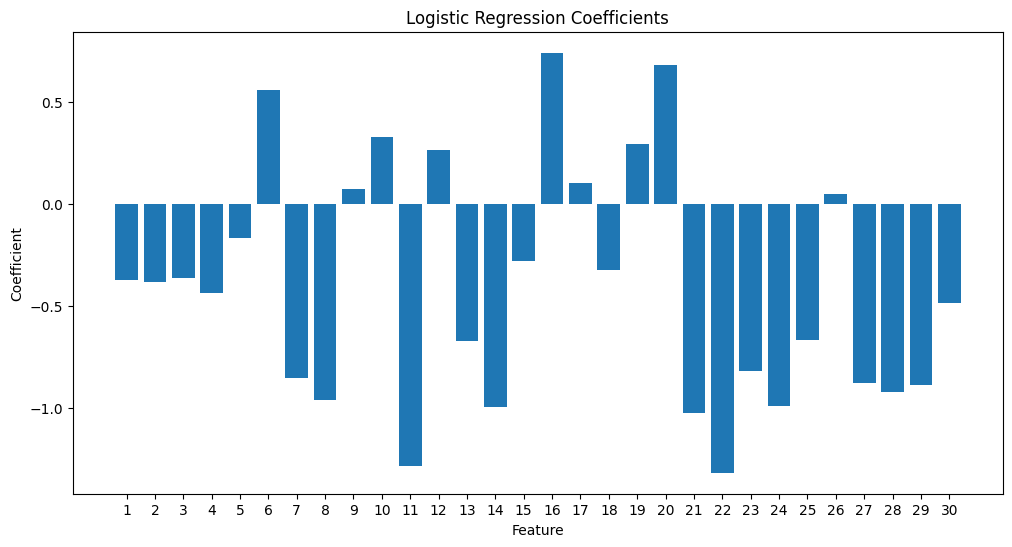

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(range(1, 31), coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(range(1, 31))
plt.show()

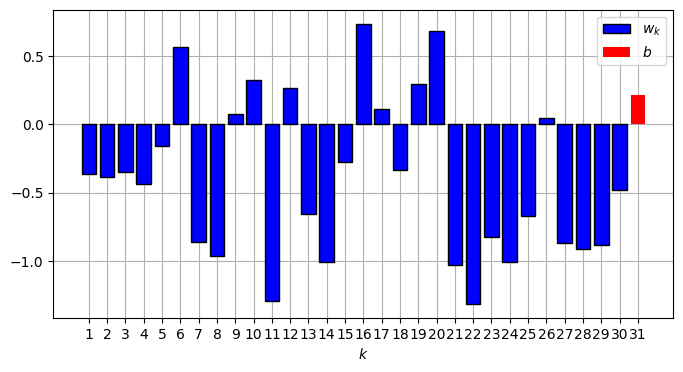

In [16]:
# Predict on the training set
y_pred = lr_model.predict(X_scaled)

# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[207   5]
 [  2 355]]


Create the confusion matrix

$$
$$

ans: $
 \left[\begin{array}{cc}
207&   5\\
2&355
\end{array}\right]
$


$$
$$


and classify the point

$x=[ 13.61    ,  24.98    ,  88.05    , 582.7     ,   0.09488 ,
         0.08511 ,   0.08625 ,   0.04489 ,   0.1609  ,   0.05871 ,
         0.4565  ,   1.29    ,   2.861   ,  43.14    ,   0.005872,
         0.01488 ,   0.02647 ,   0.009921,   0.01465 ,   0.002355,
        16.99    ,  35.27    , 108.6     , 906.5     ,   0.1265  ,
         0.1943  ,   0.3169  ,   0.1184  ,   0.2651  ,   0.07397 ]$


$$
$$

ans: $y=0$

In [17]:
# Given point
x_new = np.array([13.61, 24.98, 88.05, 582.7, 0.09488, 0.08511, 0.08625, 0.04489, 0.1609, 0.05871,
                  0.4565, 1.29, 2.861, 43.14, 0.005872, 0.01488, 0.02647, 0.009921, 0.01465, 0.002355,
                  16.99, 35.27, 108.6, 906.5, 0.1265, 0.1943, 0.3169, 0.1184, 0.2651, 0.07397])

# Scale the new point
x_new_scaled = scaler.transform(x_new.reshape(1, -1))

# Predict the class
y_new = lr_model.predict(x_new_scaled)
print(f"Predicted class for the given point: {y_new[0]}")

Predicted class for the given point: 0


## **Exercise 2**







[Wine recognition-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html), 178 datapoints, 13 variables, 3 classes

$$
x^{(i)}=[x_1^{(i)},x_2^{(i)},...,x_{13}^{(i)}],\quad y^{(i)}=0,1,2
$$

Wine data set of chemical properties of Italian
wines. The data set includes measurements of 13 different
properties for 178 wines, giving a data matrix of
dimension 178 x 13.

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline

Each of these 178 wines comes from one of three grape
varieties: Barolo, Grignolino, or Barbera (0,1 tai 2).

In [ ]:
#load the dataset
from sklearn import datasets
X,y=datasets.load_wine(return_X_y=True)
#rows of X are the coordinates x1...x13
#y contains the classes 0,1,2

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Draw a picture like below of the distribution of values of the coordinates $x_1-x_{13}$ within each class

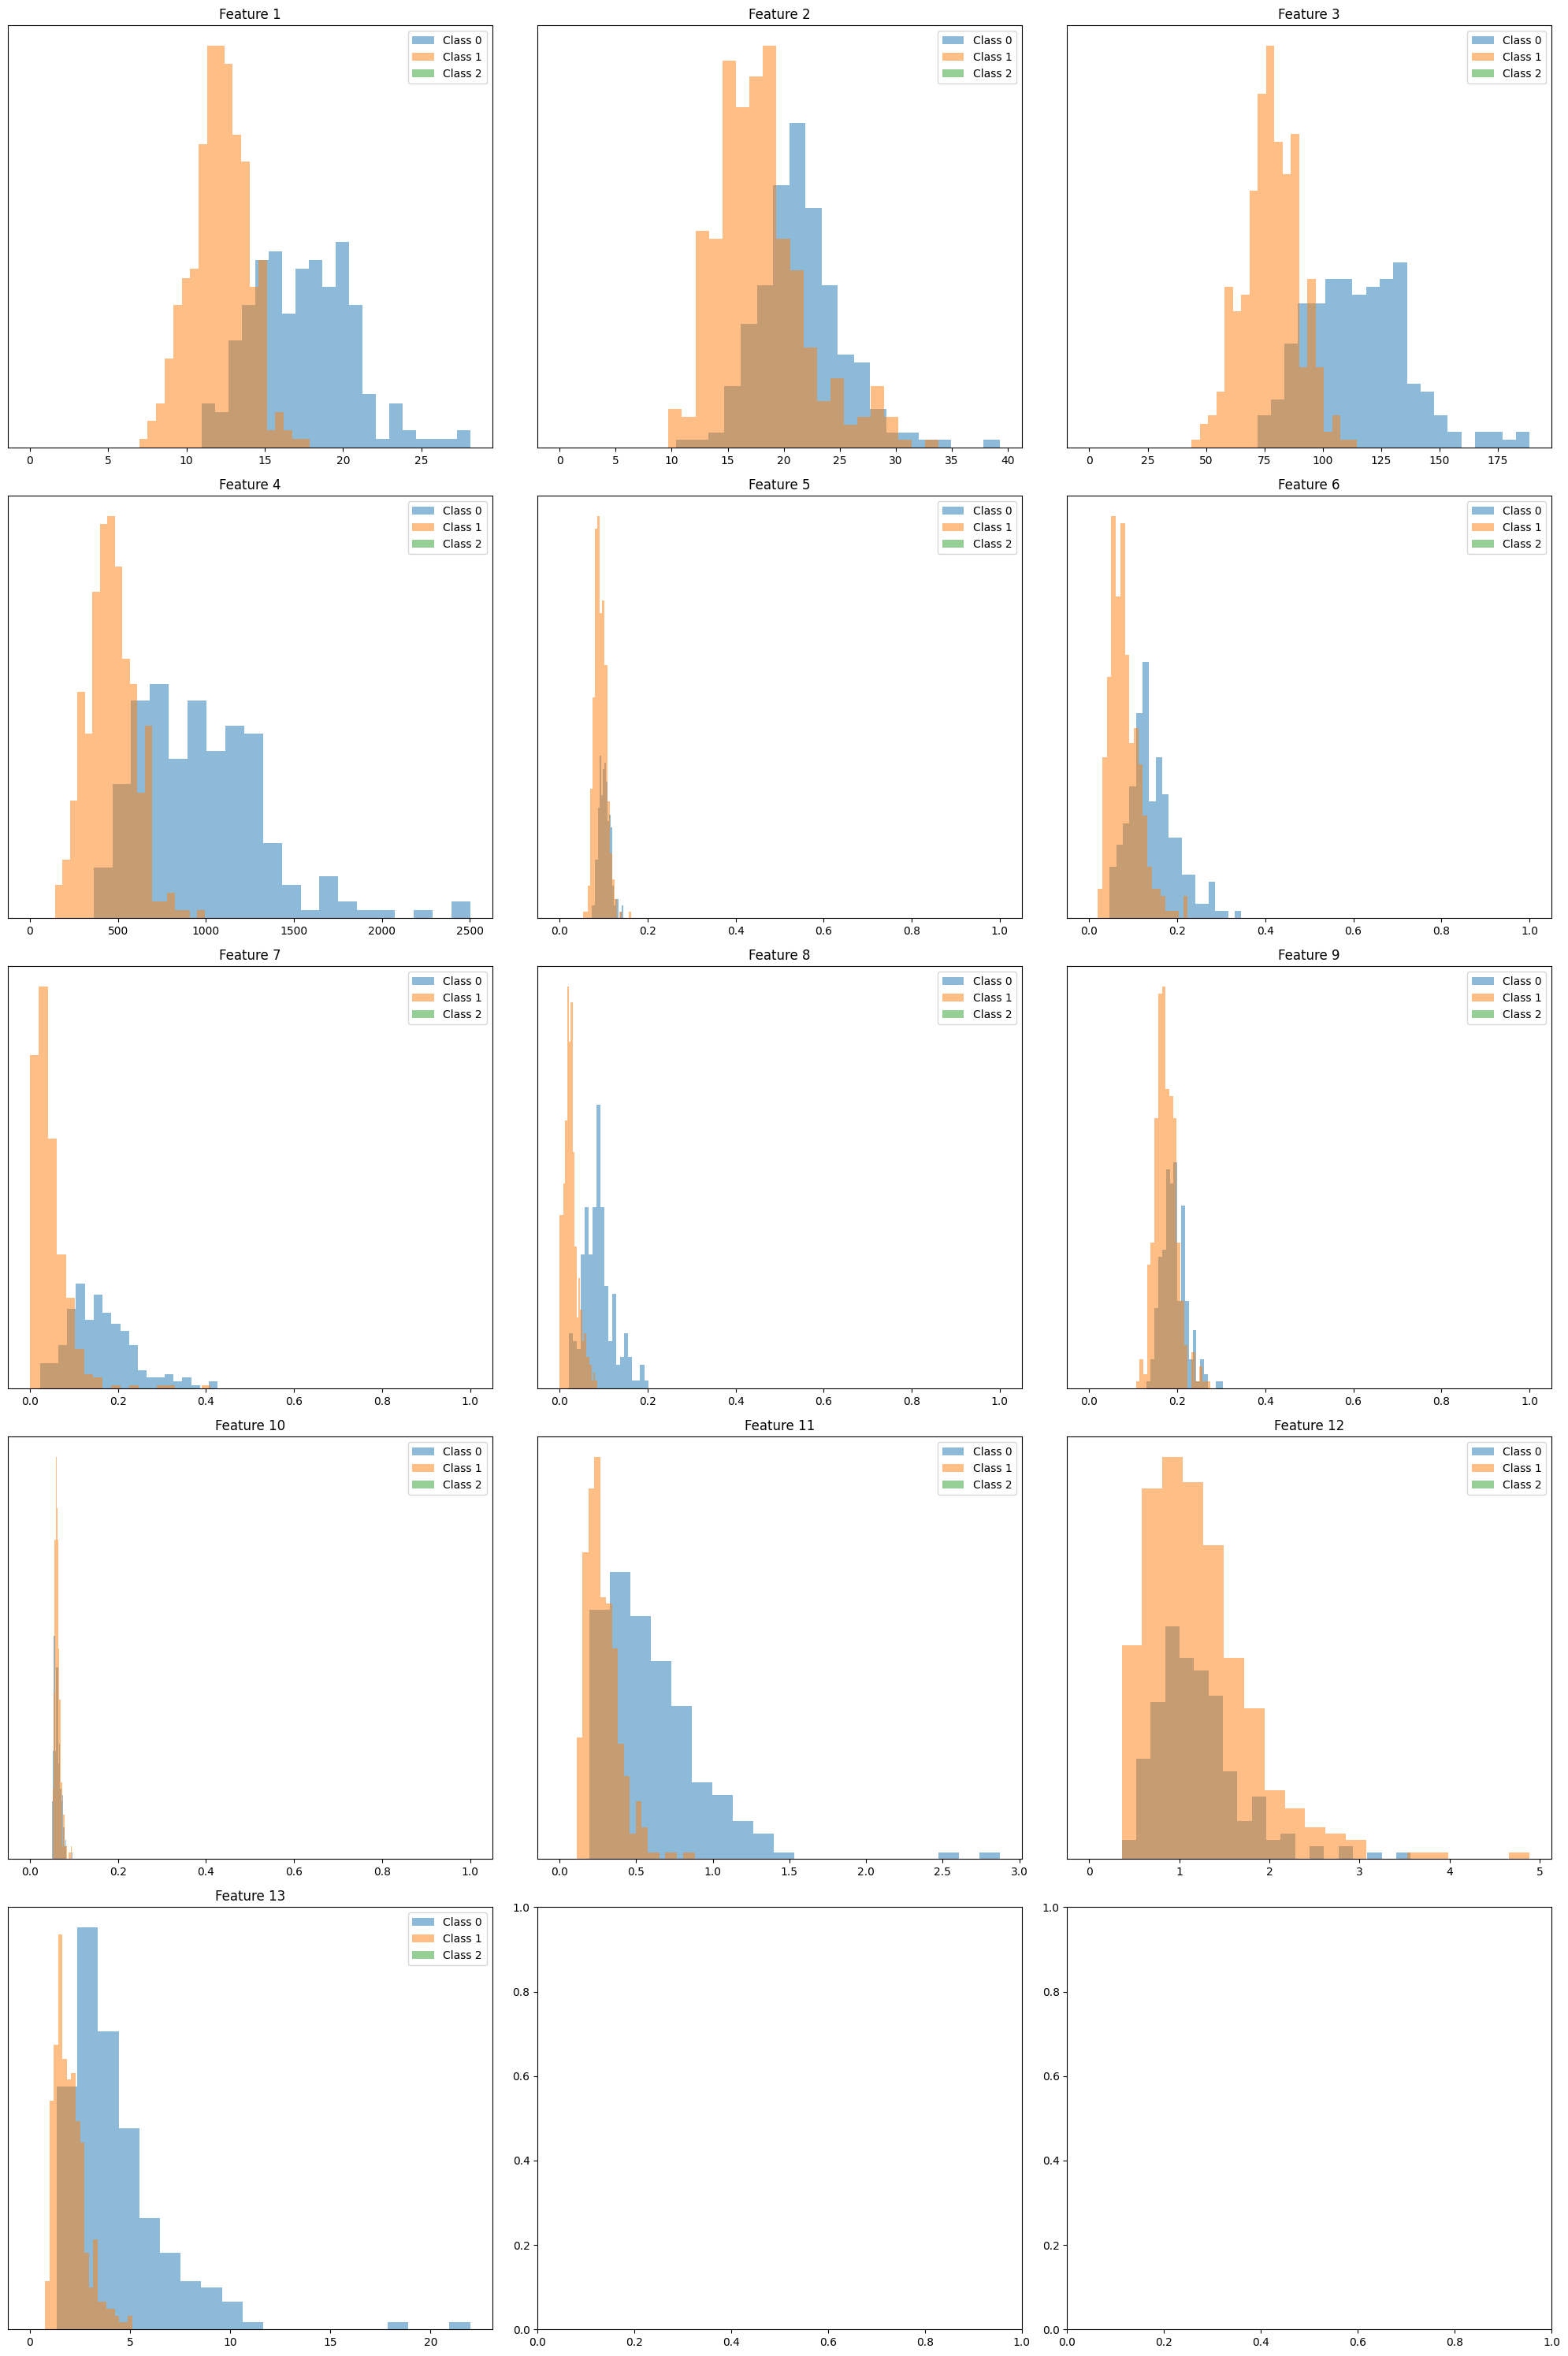

In [19]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.ravel()

for i in range(13):
    for class_label in range(3):
        class_data = X[y == class_label, i]
        axes[i].hist(class_data, bins=20, alpha=0.5, label=f'Class {class_label}')
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_yticks([])
    axes[i].legend()

plt.tight_layout()
plt.show()

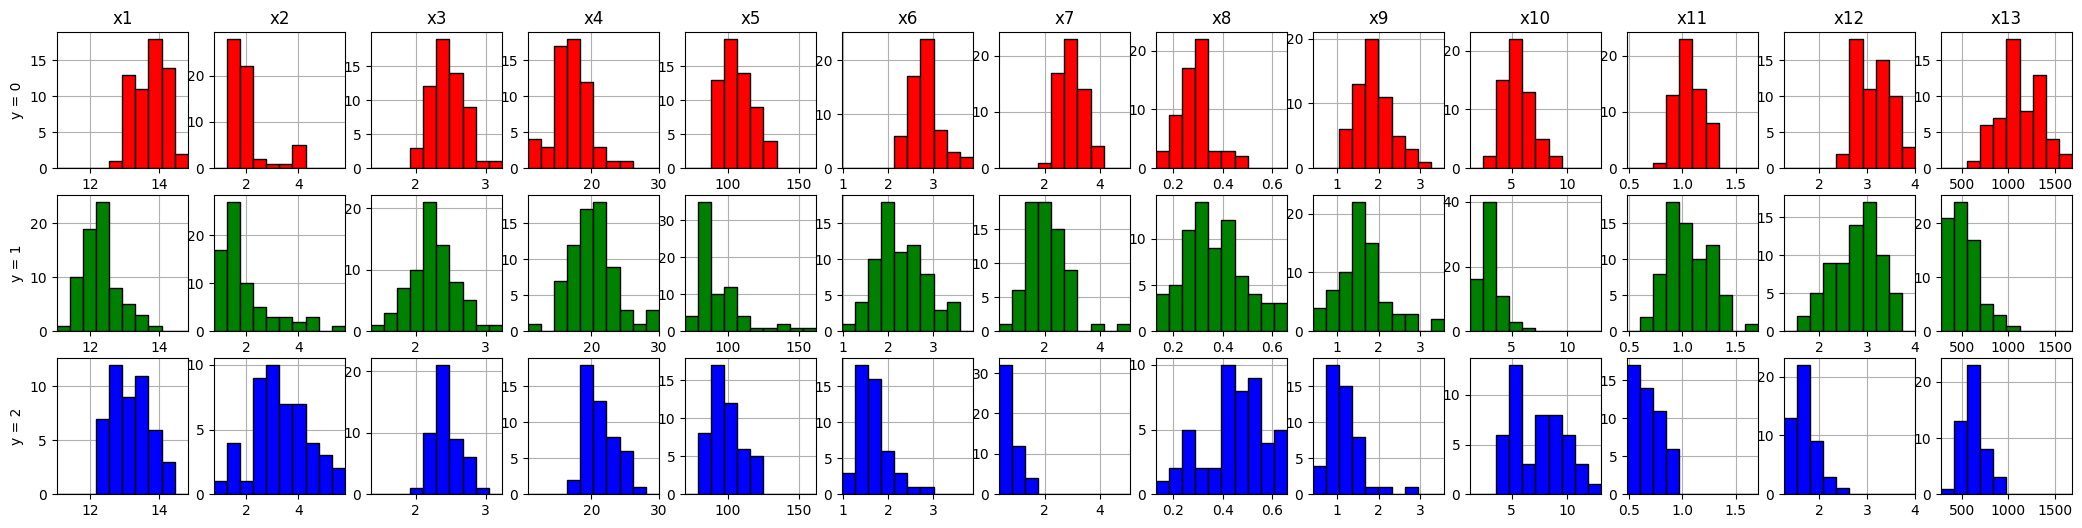

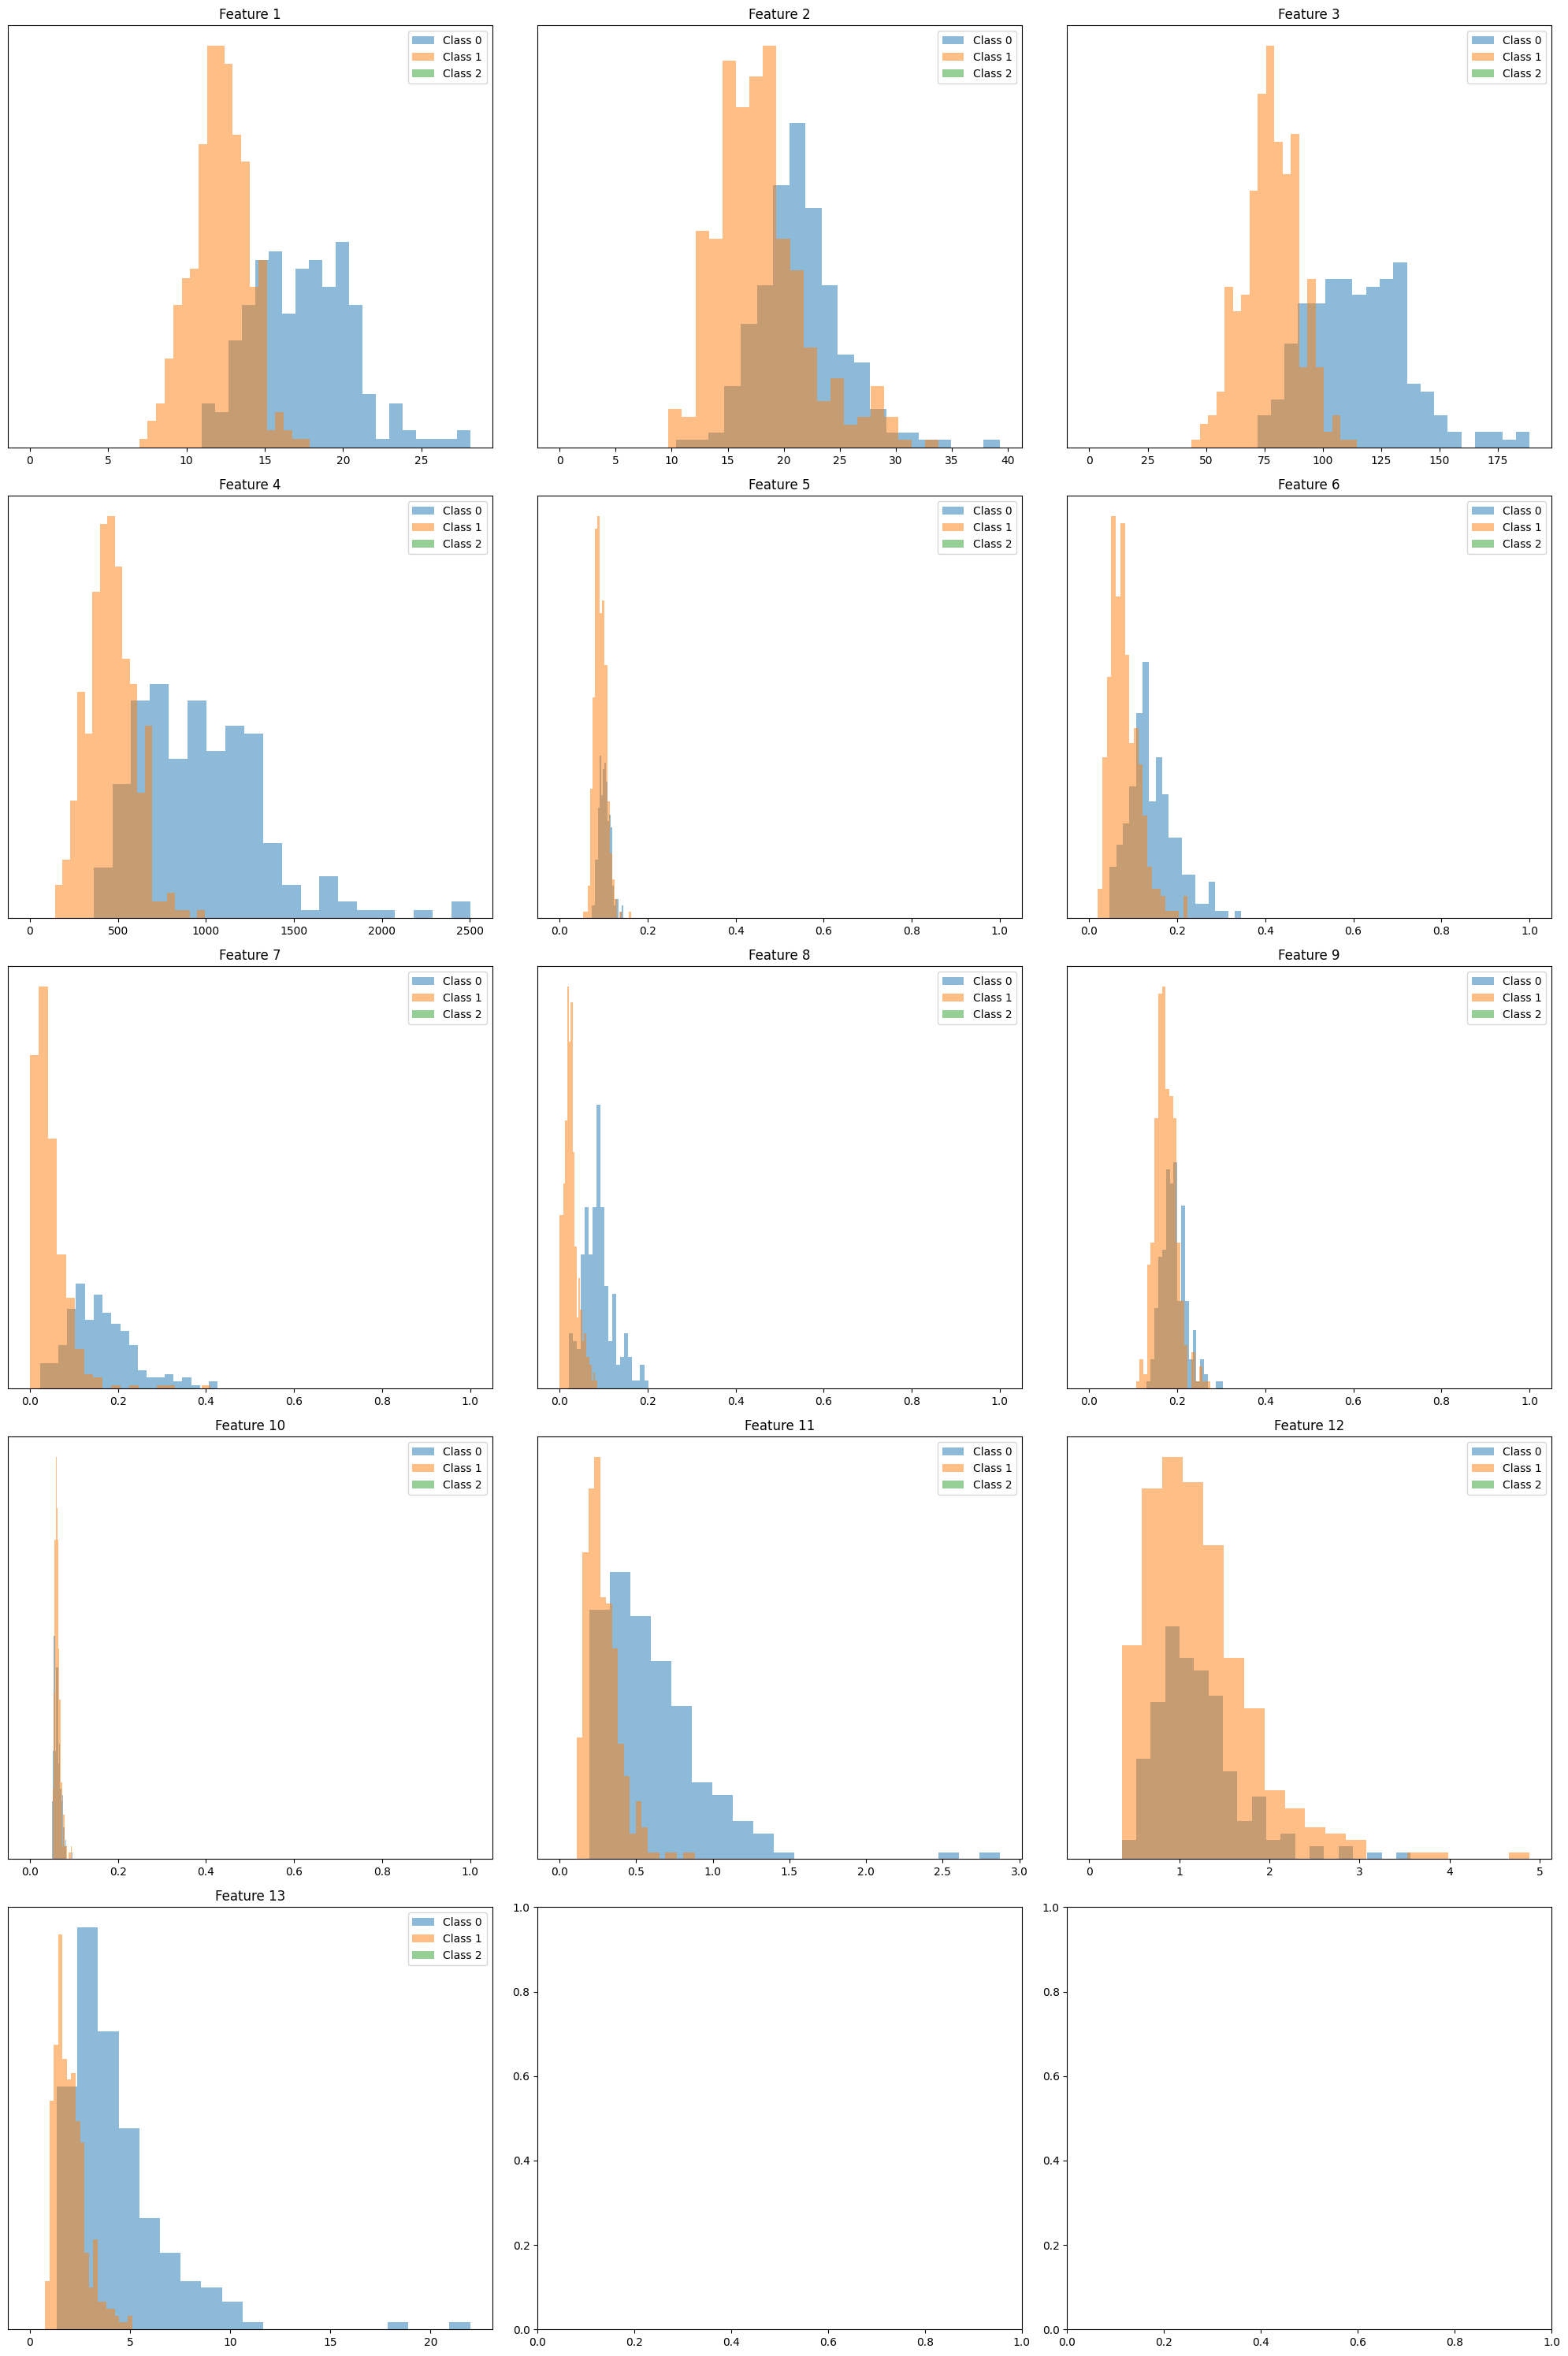

In [20]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.ravel()

for i in range(13):
    for class_label in range(3):
        class_data = X[y == class_label, i]
        axes[i].hist(class_data, bins=20, alpha=0.5, label=f'Class {class_label}')
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_yticks([])
    axes[i].legend()

plt.tight_layout()
plt.show()

In [21]:
# Train multinomial logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_scaled, y)

# Get coefficients and intercepts
coefficients = lr_model.coef_
intercepts = lr_model.intercept_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (30,).

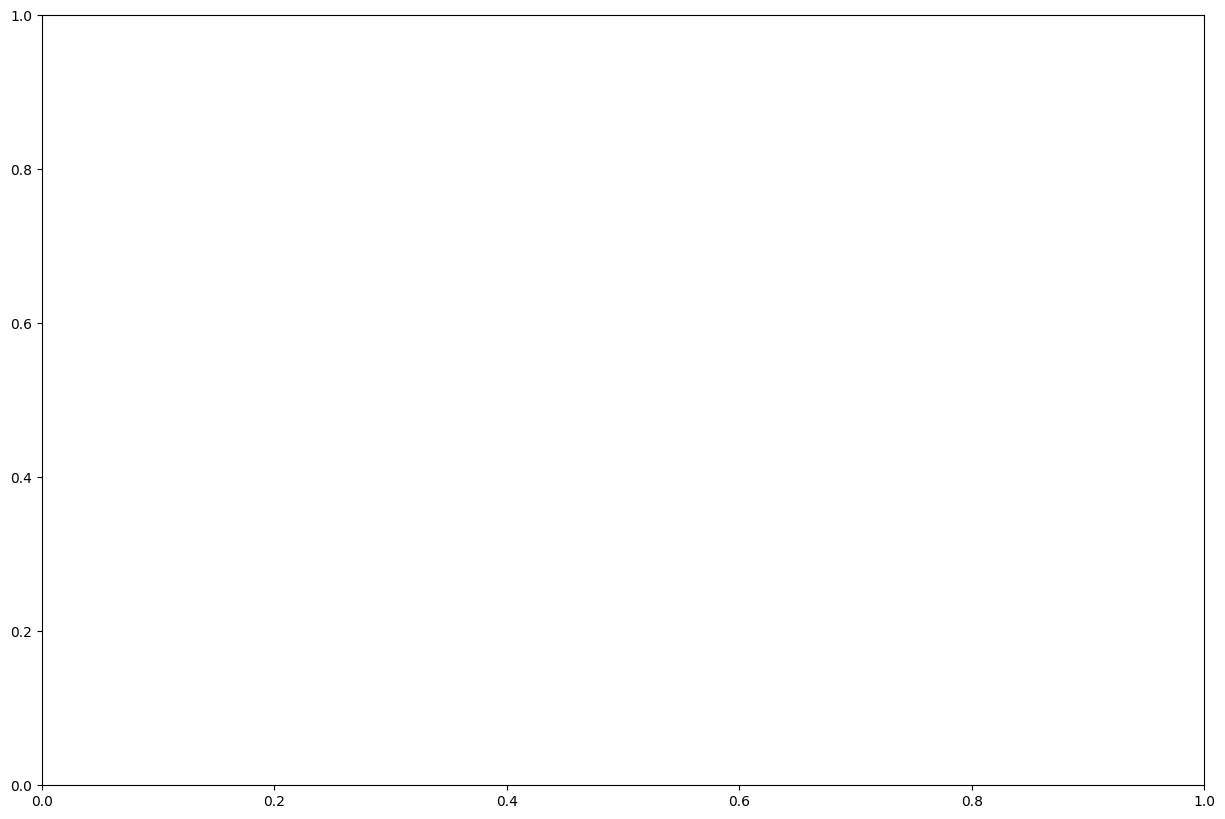

In [22]:
plt.figure(figsize=(15, 10))
for i in range(3):
    plt.bar(np.arange(13) + i*0.25, coefficients[i], width=0.25, label=f'Class {i}')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Multinomial Logistic Regression Coefficients')
plt.xticks(np.arange(13) + 0.25, range(1, 14))
plt.legend()
plt.show()

Find coefficients to the formula

$$
[z_1,z_2,z_3]=[\widehat{x}_1,\widehat{x}_2,...,\widehat{x}_{13}]@\left[
\begin{array}{ccc}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}\\
\vdots&\vdots&\vdots\\
w_{13,1}&w_{13,2}&w_{13,3}
\end{array}
\right]+[b_1,b_2,b_3]
$$

to classify a wine $ x=[x_1,x_2,\dots,x_{13}]$ using the scaled coordinates  (means $= 0$ and standard deviations $= 1$), and draw a picture like below.



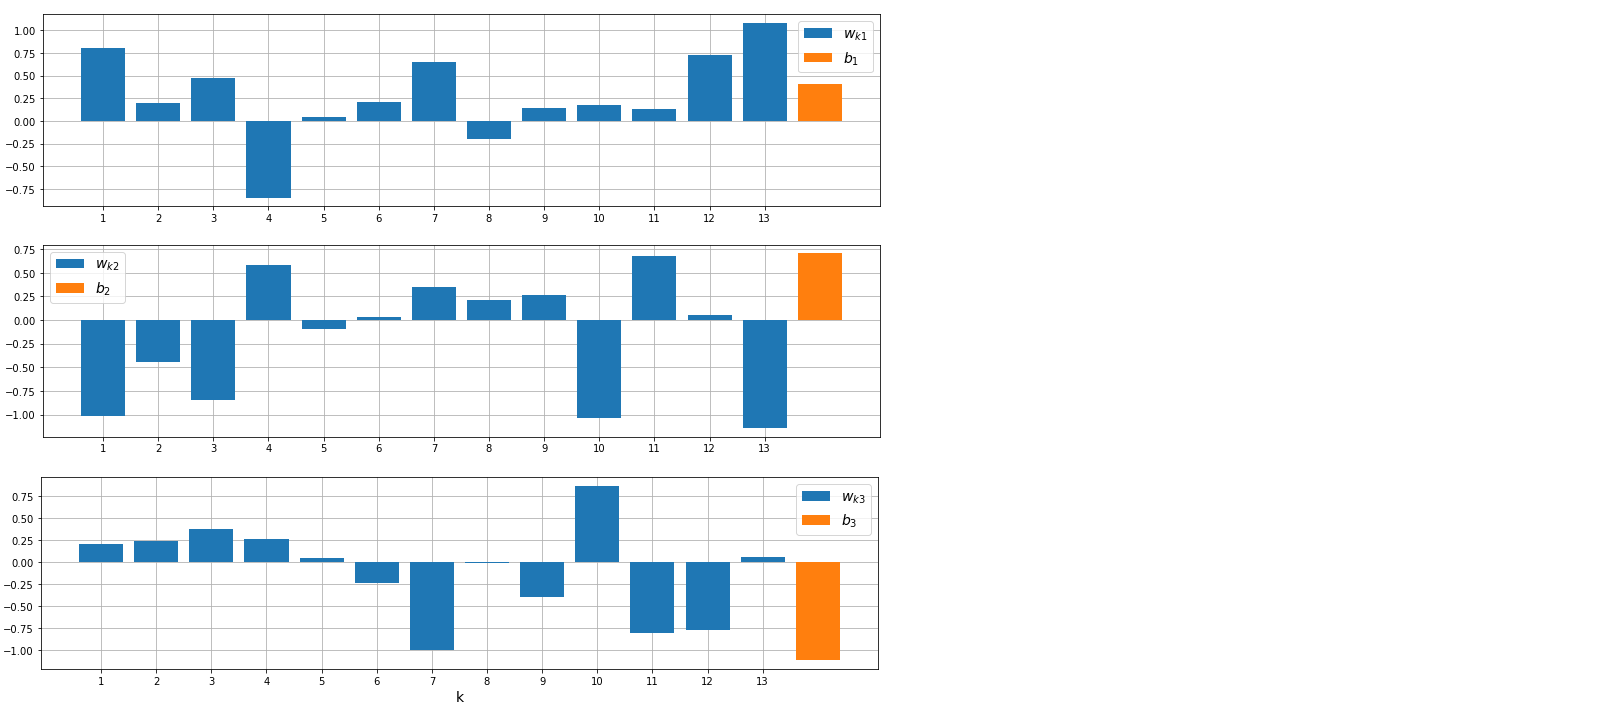

Create the  confusion matrix

ans: $\left[\begin{array}{ccc}
59&0&0\\0&71&0\\0&0&48
\end{array}\right]$

In [23]:
# Predict on the training set
y_pred = lr_model.predict(X_scaled)

# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[207   5]
 [  2 355]]


and classify the wine

$x=[13.0,2.34,2.36,19.5,99.7,2.29,2.03,0.36,1.59,5.1,0.96,2.61,746]$

(ans: $y=1$)

In [24]:
# Given wine
x_new = np.array([13.0, 2.34, 2.36, 19.5, 99.7, 2.29, 2.03, 0.36, 1.59, 5.1, 0.96, 2.61, 746])

# Scale the new point
x_new_scaled = scaler.transform(x_new.reshape(1, -1))

# Predict the class
y_new = lr_model.predict(x_new_scaled)
print(f"Predicted class for the given wine: {y_new[0]}")

ValueError: X has 13 features, but StandardScaler is expecting 30 features as input.

## **Exercise 3**










Use the points $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,$ given below to find coefficients $w_1,w_2,w_3,w_4,w_5$ and $b$ such that a point $x=[x_1,x_2]$ belongs to

class $y=1$, if
$z=w_1x_1^2+w_2x_1x_2+w_3x_2^2+w_4x_1+w_5x_2+b> 0$

class $y=0$, if $z<0$


using logistic regression for the datapoints

 $$[(x^{(i)}_1)^2,x^{(i)}_1x^{(i)}_2,(x^{(i)}_2)^2,x^{(i)}_1,x^{(i)}_2 ],\quad y^{(i)}$$

and draw a picture like below of the corresponding classification of 2D-points

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Set random seed for reproducibility
np.random.seed(0)

# Generate points for class y=1
r1 = np.random.rand(100)
th1 = 2 * np.pi * np.random.rand(100)
x1_class1 = r1 * np.cos(th1)
x2_class1 = 1.5 * r1 * np.sin(th1)

# Generate points for class y=0
r2 = 2 + np.random.rand(100)
th2 = 2 * np.pi * np.random.rand(100)
x1_class0 = r2 * np.cos(th2)
x2_class0 = 1.5 * r2 * np.sin(th2)

# Combine the data
X = np.vstack((np.column_stack((x1_class1, x2_class1)), np.column_stack((x1_class0, x2_class0))))
y = np.hstack((np.ones(100), np.zeros(100)))

In [27]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [28]:
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_poly, y)

# Get coefficients and intercept
coefficients = lr_model.coef_[0]
intercept = lr_model.intercept_[0]

# Print coefficients and intercept
print("Coefficients:")
print(f"w1 (x1^2): {coefficients[0]:.4f}")
print(f"w2 (x1*x2): {coefficients[1]:.4f}")
print(f"w3 (x2^2): {coefficients[2]:.4f}")
print(f"w4 (x1): {coefficients[3]:.4f}")
print(f"w5 (x2): {coefficients[4]:.4f}")
print(f"b (intercept): {intercept:.4f}")

Coefficients:
w1 (x1^2): 0.0435
w2 (x1*x2): 0.0835
w3 (x2^2): -1.9482
w4 (x1): -0.0115
w5 (x2): -1.1689
b (intercept): 6.0707


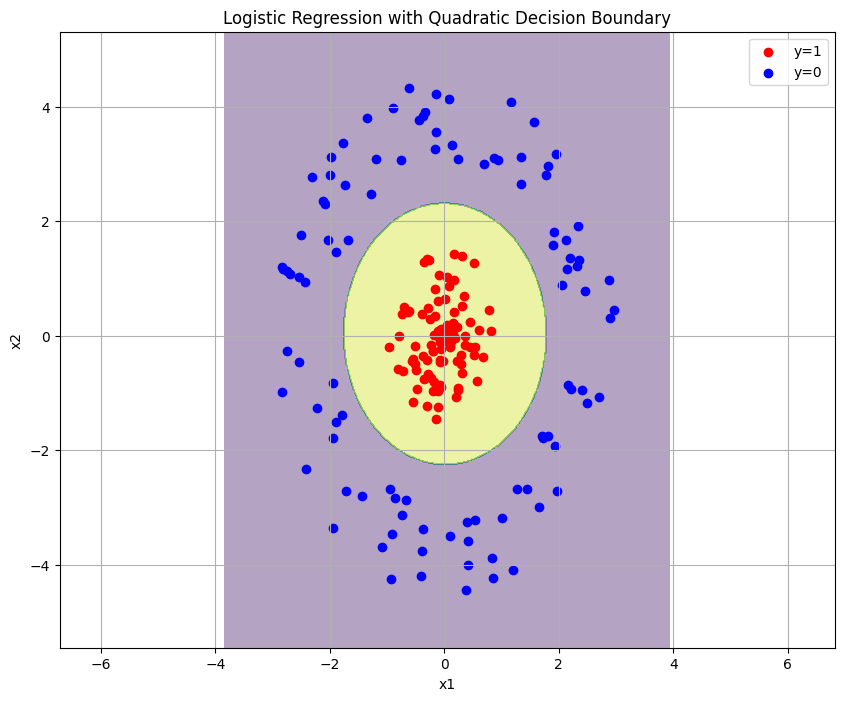

In [29]:
# Create a mesh grid
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

# Make predictions on the mesh grid
Z = lr_model.predict(poly.transform(np.c_[xx1.ravel(), xx2.ravel()]))
Z = Z.reshape(xx1.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(x1_class1, x2_class1, c='red', label='y=1')
plt.scatter(x1_class0, x2_class0, c='blue', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression with Quadratic Decision Boundary')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

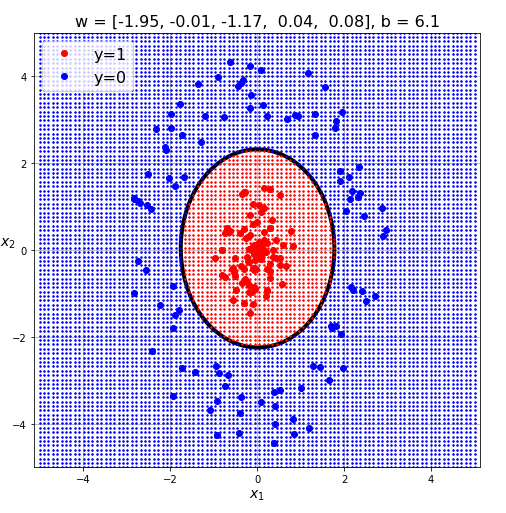

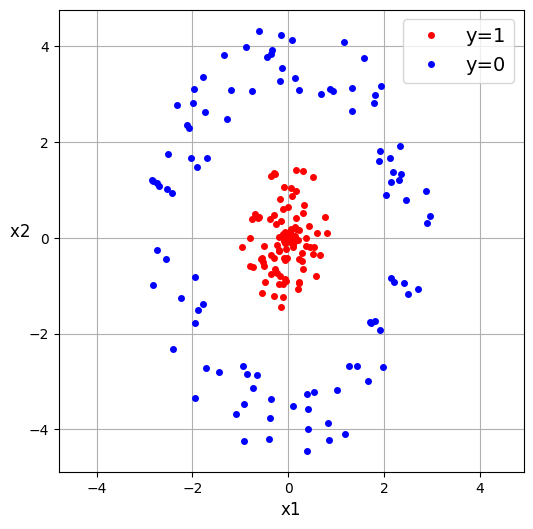

In [30]:
#points
np.random.seed(0)

r1=np.random.rand(100)
th1=2*np.pi*np.random.rand(100)
x1pun=r1*np.cos(th1)
x2pun=1.5*r1*np.sin(th1)

r2=2+np.random.rand(100)
th2=2*np.pi*np.random.rand(100)
x1sin=r2*np.cos(th2)
x2sin=1.5*r2*np.sin(th2)


plt.figure(figsize=(6,6))
plt.plot(x1pun,x2pun,'r.',markersize=8,label='y=1')
plt.plot(x1sin,x2sin,'b.',markersize=8,label='y=0')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=14)
plt.xlabel('x1',fontsize=12)
plt.ylabel('x2 ',rotation=0,fontsize=12)
plt.show()